In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

# Provide file path here
file_path = "C:/Users/SANYAM/Downloads/bank.csv"  # Change to your file

if file_path.lower().endswith('.csv'):
    data = pd.read_csv(file_path)
    print("CSV file loaded into 'data' variable.")
elif file_path.lower().endswith(('.xls', '.xlsx')):
    data = pd.read_excel(file_path)
    print("Excel file loaded into 'data' variable.")
else:
    print("File type not supported for automatic reading.")
    data = None

# Show first rows if data loaded
if data is not None:
    print(data.head())


CSV file loaded into 'data' variable.
   AGE          JOB  MARITAL  EDUCATION DEFAULT  BALANCE HOUSING LOAN  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    CONTACT  DAY MONTH  DURATION  CAMPIGN  P days  PREVIOUS POUTCOME   Y  
0  cellular   19   oct        79        1      -1         0  unknown  no  
1  cellular   11   may       220        1     339         4  failure  no  
2  cellular   16   apr       185        1     330         1  failure  no  
3   unknown    3   jun       199        4      -1         0  unknown  no  
4   unknown    5   may       226        1      -1         0  unknown  no  


In [3]:
data.head()

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPIGN,P days,PREVIOUS,POUTCOME,Y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.shape

(4521, 17)

In [5]:
data.columns

Index(['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING',
       'LOAN', 'CONTACT', 'DAY', 'MONTH', 'DURATION', 'CAMPIGN', 'P days',
       'PREVIOUS', 'POUTCOME', 'Y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AGE        4521 non-null   int64 
 1   JOB        4521 non-null   object
 2   MARITAL    4521 non-null   object
 3   EDUCATION  4521 non-null   object
 4   DEFAULT    4521 non-null   object
 5   BALANCE    4521 non-null   int64 
 6   HOUSING    4521 non-null   object
 7   LOAN       4521 non-null   object
 8   CONTACT    4521 non-null   object
 9   DAY        4521 non-null   int64 
 10  MONTH      4521 non-null   object
 11  DURATION   4521 non-null   int64 
 12  CAMPIGN    4521 non-null   int64 
 13  P days     4521 non-null   int64 
 14  PREVIOUS   4521 non-null   int64 
 15  POUTCOME   4521 non-null   object
 16  Y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [7]:
data.dtypes

AGE           int64
JOB          object
MARITAL      object
EDUCATION    object
DEFAULT      object
BALANCE       int64
HOUSING      object
LOAN         object
CONTACT      object
DAY           int64
MONTH        object
DURATION      int64
CAMPIGN       int64
P days        int64
PREVIOUS      int64
POUTCOME     object
Y            object
dtype: object

In [8]:
data.isnull().sum()

AGE          0
JOB          0
MARITAL      0
EDUCATION    0
DEFAULT      0
BALANCE      0
HOUSING      0
LOAN         0
CONTACT      0
DAY          0
MONTH        0
DURATION     0
CAMPIGN      0
P days       0
PREVIOUS     0
POUTCOME     0
Y            0
dtype: int64

In [9]:
cat_values = data.select_dtypes(include=['object']).columns
cat_values

Index(['JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'HOUSING', 'LOAN', 'CONTACT',
       'MONTH', 'POUTCOME', 'Y'],
      dtype='object')

In [10]:
print(data.columns.tolist())


['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING', 'LOAN', 'CONTACT', 'DAY', 'MONTH', 'DURATION', 'CAMPIGN', 'P days', 'PREVIOUS', 'POUTCOME', 'Y']


In [11]:
data.columns = data.columns.str.strip()
print(data.columns.tolist())

['AGE', 'JOB', 'MARITAL', 'EDUCATION', 'DEFAULT', 'BALANCE', 'HOUSING', 'LOAN', 'CONTACT', 'DAY', 'MONTH', 'DURATION', 'CAMPIGN', 'P days', 'PREVIOUS', 'POUTCOME', 'Y']


In [12]:
[col for col in data.columns if 'marital' in col.lower()]

['MARITAL']

In [13]:
if 'marital' in data.columns:
    print(data['marital'].value_counts())

In [14]:
# Find the 'job' column (case-insensitive)
job_col = next((col for col in data.columns if col.lower() == 'job'), None)

if job_col:
    print(f"Column '{job_col}' found. Here are the value counts:")
    print(data[job_col].value_counts())
else:
    print(f"No column named 'job' found in this dataset.")
    print("Available columns are:", data.columns.tolist())

Column 'JOB' found. Here are the value counts:
JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


In [15]:
# Try to find education column ignoring case
education_cols = [col for col in data.columns if col.lower() == 'education']

if education_cols:
    edu_col = education_cols[0]
    print(f"Column found: '{edu_col}'. Here are the value counts:")
    print(data[edu_col].value_counts())
else:
    print("No column named 'education' found. Available columns:")
    print(data.columns.tolist())

Column found: 'EDUCATION'. Here are the value counts:
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


In [16]:
for col in data[cat_values]:
  print(col)
  print(data[col].value_counts())
  print()

JOB
JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

MARITAL
MARITAL
married     2797
single      1196
divorced     528
Name: count, dtype: int64

EDUCATION
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

DEFAULT
DEFAULT
no     4445
yes      76
Name: count, dtype: int64

HOUSING
HOUSING
yes    2559
no     1962
Name: count, dtype: int64

LOAN
LOAN
no     3830
yes     691
Name: count, dtype: int64

CONTACT
CONTACT
cellular     2896
unknown      1324
telephone     301
Name: count, dtype: int64

MONTH
MONTH
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: count, dtype: int64

POUTCOME
POUTCOME
unknown

In [17]:
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
  le = LabelEncoder()
  data[col]=le.fit_transform(data[col])

In [18]:
for col in data[cat_values]:
  print(col)
  print(data[col].value_counts())
  print()

JOB
JOB
4     969
1     946
9     768
0     478
7     417
5     230
6     183
2     168
10    128
3     112
8      84
11     38
Name: count, dtype: int64

MARITAL
MARITAL
1    2797
2    1196
0     528
Name: count, dtype: int64

EDUCATION
EDUCATION
1    2306
2    1350
0     678
3     187
Name: count, dtype: int64

DEFAULT
DEFAULT
0    4445
1      76
Name: count, dtype: int64

HOUSING
HOUSING
1    2559
0    1962
Name: count, dtype: int64

LOAN
LOAN
0    3830
1     691
Name: count, dtype: int64

CONTACT
CONTACT
0    2896
2    1324
1     301
Name: count, dtype: int64

MONTH
MONTH
8     1398
5      706
1      633
6      531
9      389
0      293
3      222
4      148
10      80
11      52
7       49
2       20
Name: count, dtype: int64

POUTCOME
POUTCOME
3    3705
0     490
1     197
2     129
Name: count, dtype: int64

Y
Y
0    4000
1     521
Name: count, dtype: int64



In [19]:
data.head(5)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPIGN,P days,PREVIOUS,POUTCOME,Y
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,0


In [20]:
correlation_data = data.corr()

print(correlation_data)

                AGE       JOB   MARITAL  EDUCATION   DEFAULT   BALANCE  \
AGE        1.000000 -0.021550 -0.381625  -0.121479 -0.017874  0.094004   
JOB       -0.021550  1.000000  0.069390   0.170160  0.008324  0.011713   
MARITAL   -0.381625  0.069390  1.000000   0.102714 -0.020745  0.028762   
EDUCATION -0.121479  0.170160  0.102714   1.000000 -0.010534  0.073274   
DEFAULT   -0.017874  0.008324 -0.020745  -0.010534  1.000000 -0.133943   
BALANCE    0.094004  0.011713  0.028762   0.073274 -0.133943  1.000000   
HOUSING   -0.193820 -0.128353 -0.029851  -0.087070  0.006881 -0.040282   
LOAN      -0.011178 -0.040245 -0.045210  -0.054086  0.063994 -0.100990   
CONTACT    0.015170 -0.074068 -0.068236  -0.110554  0.008448 -0.014472   
DAY       -0.017985  0.012865  0.008794   0.014926 -0.013261 -0.004523   
MONTH     -0.040886 -0.096613 -0.035855  -0.050086  0.014297  0.017649   
DURATION  -0.006788 -0.007960  0.005323  -0.013823 -0.013535  0.031835   
CAMPIGN   -0.004821 -0.000976  0.00699

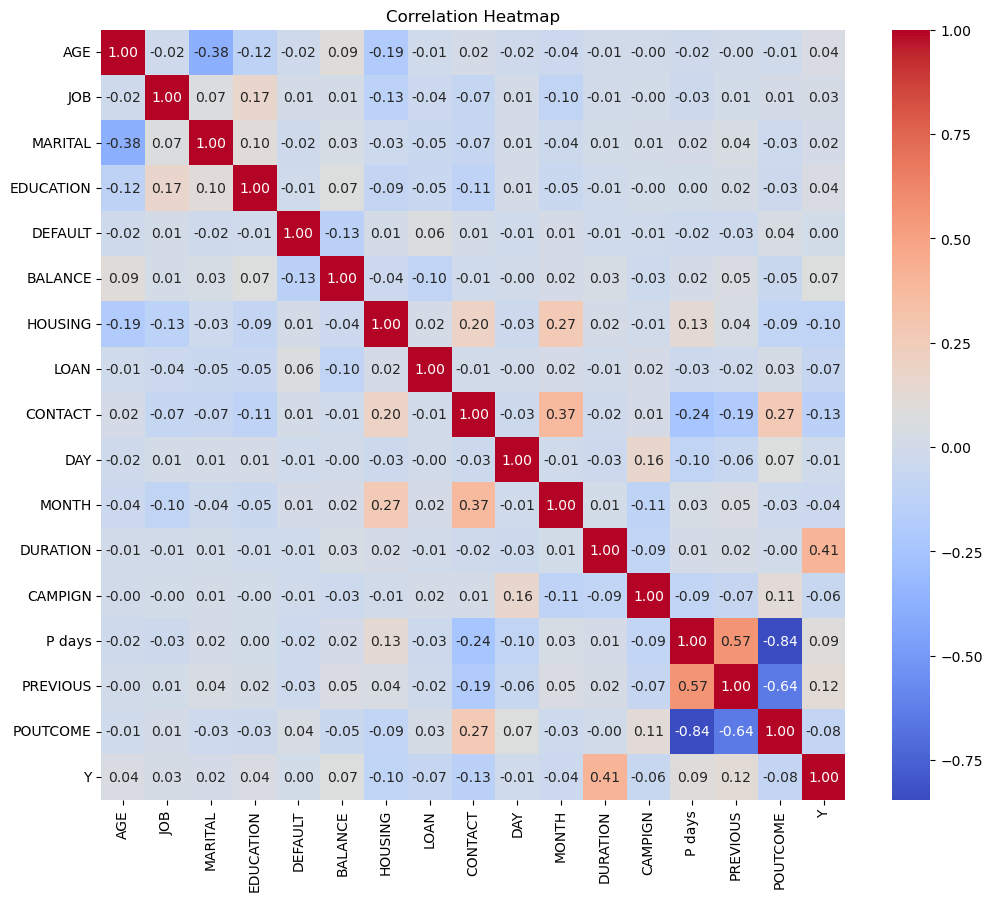

In [21]:
# generate heat map

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
model = DecisionTreeClassifier(max_depth=3)  # Try with 3–5 for simplicity


NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# --- Step 1: Load your data ---
# Replace 'your_data.csv' with your actual filename/path
data = pd.read_csv('bank.csv')

# --- Step 2: Clean column names ---
data.columns = data.columns.str.strip()

# --- Step 3: Define target column name ---
target_name = 'y'  # Change if your target column has a different name

# Safely find the target column ignoring case and spaces
target_cols = [col for col in data.columns if col.strip().lower() == target_name.lower()]
if not target_cols:
    raise KeyError(f"Target column '{target_name}' not found. Available columns: {data.columns.tolist()}")
target_col = target_cols[0]

# --- Step 4: Separate features and target ---
X = data.drop(columns=[target_col])
y = data[target_col]

# --- Step 5: Encode categorical variables (required for sklearn) ---
# This handles string columns like 'job', 'marital', 'education', etc.
X_encoded = pd.get_dummies(X, drop_first=True)

# --- Step 6: Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# --- Step 7: Train Decision Tree classifier ---
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# --- Step 8: Make predictions ---
y_pred = model.predict(X_test)

# --- Step 9: Evaluate model with correct pos_label ---
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='yes', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, pos_label='yes', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='yes', zero_division=0))

# --- Step 10: Visualize the trained decision tree ---
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, rounded=True, feature_names=X_encoded.columns, class_names=model.classes_, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


In [ ]:
data.shape